<a href="https://colab.research.google.com/github/FajarKKP/ML-DL_related_project/blob/main/SignLanguageSIBI_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 642 kB 30.3 MB/s 
     |████████████████████████████████| 6.4 MB 51.3 MB/s 
     |████████████████████████████████| 1.2 MB 49.1 MB/s 
     |████████████████████████████████| 3.4 MB 55.6 MB/s 
     |████████████████████████████████| 87 kB 1.5 MB/s 
     |████████████████████████████████| 596 kB 52.9 MB/s 
     |████████████████████████████████| 120 kB 61.4 MB/s 
     |████████████████████████████████| 11.2 MB 23.6 MB/s 
     |████████████████████████████████| 840 kB 20.3 MB/s 
     |████████████████████████████████| 1.1 MB 68.6 MB/s 
     |████████████████████████████████| 77 kB 4.4 MB/s 
     |████████████████████████████████| 237 kB 58.5 MB/s 
     |████████████████████████████████| 42.5 MB 1.2 MB/s 
     |████████████████████████████████| 25.3 MB 89.9 MB/s 
     |████████████████████████████████| 48.3 MB 1.5 MB/s 
     |███████████████████████████

In [2]:
!sudo apt-get install libportaudio2
!pip install sounddevice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 64.6 kB of archives.
After this operation, 215 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Fetched 64.6 kB in 0s (992 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import os
import PIL
import PIL.Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# from platform import python_version

# print(python_version())
# print(tf.__version__)
# print(cv2.__version__)
# print(np.__version__)
# print(keras.__version__)

3.7.13
2.8.2


NameError: ignored

In [44]:
# load dataset


datset = DataLoader.from_folder('/content/drive/MyDrive/Skripsi/Dataset Skripsi')


train_datset, all_datset = datset.split(0.8)
val_datset, test_datset = all_datset.split(0.5)

INFO:tensorflow:Load image with size: 12119, num_label: 24, labels: A, B, C, D, E, F, G, H, I, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y.


INFO:tensorflow:Load image with size: 12119, num_label: 24, labels: A, B, C, D, E, F, G, H, I, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y.


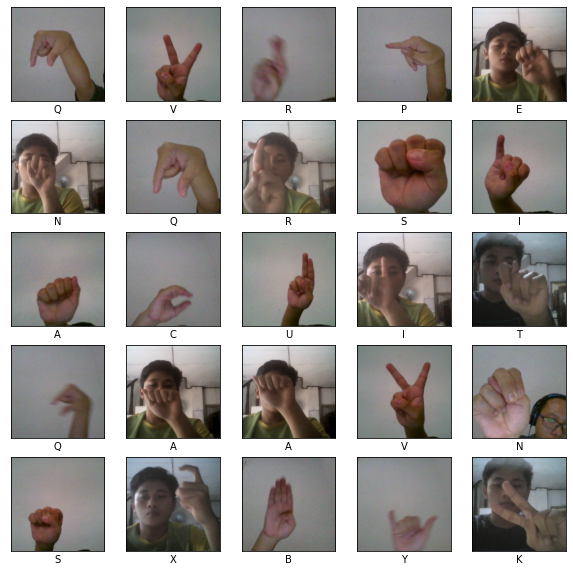

In [24]:
# Contoh dataset yang dipakai
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(datset.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(datset.index_to_label[label.numpy()])
plt.show()

In [29]:
data_augmentation = tf.keras.Sequential
([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [45]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(150,150,3)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(24, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [46]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [50]:
history = model.fit(train_datset, validation_data=val_datset, steps_per_epoch=100,epochs=15, validation_steps=50, verbose=2)

ValueError: ignored